<a href="https://colab.research.google.com/github/kryogenica/Image-compression-using-Matrix-Product-States/blob/master/Image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix Product States to lossly compress images

This notebook is based on the work of the paper titled "[Tensor Networks for Image Compression](http://diposit.ub.edu/dspace/bitstream/2445/96365/1/TFG_Fis_Trujillo_Boque_Alex.pdf)" by Alex Trujillo Boque.

In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


The images to be used will be from the Fashion-MNIST data set.


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Preprocess the data

The data must be preprocessed before implementing it through Matrix Product State (MPS) tensor network. If you inspect the first image in the training set, its pixel values fall in the range of 0 to 255:

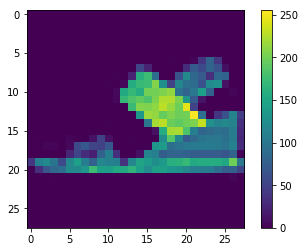

In [20]:
image = train_images[217]
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before trying to compress through the MPS network. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

As you can see in the image below its pixel values range from 0 to 1.

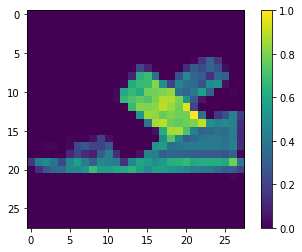

In [22]:
image = train_images[217]
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

Before proceeding a small patch of the above image will be extracted. This will be used as a smaller image as to better explain the following content. The requirement to compress an image with the MPS algorithim specificed in the paper is that its dimension needs to be 2^n x 2^n. 

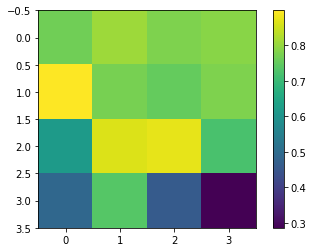

In [23]:
image = train_images[217][13:17,17:21]
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

We will use schematic below to label the pixels in the image above. For this case all pixels have two coordinates assigned to them. As the dimesion of the image increases more coordinates are assigned to the image.


![SubBlockSystem](https://drive.google.com/uc?export=view&id=1JEYmaje0RSEBdKyDnHELD5TU2eYsi0wW)

In [0]:
sub_image_1 = np.reshape(image[0:2,0:2].copy(),4)
sub_image_2 = np.reshape(image[0:2,2:4].copy(),4)
sub_image_3 = np.reshape(image[2:4,0:2].copy(),4)
sub_image_4 = np.reshape(image[2:4,2:4].copy(),4)

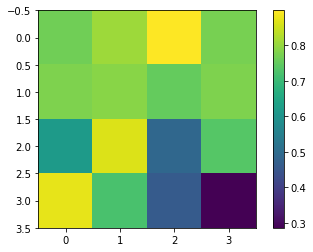

In [25]:
C = np.vstack((sub_image_1,sub_image_2,sub_image_3,sub_image_4))
plt.figure()
plt.imshow(C)
plt.colorbar()
plt.grid(False)
plt.show()

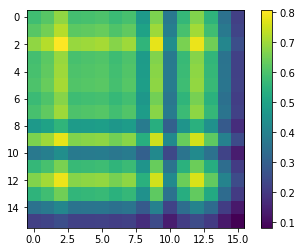

In [26]:
C_vectorized = np.reshape(C,(C.shape[0]*C.shape[0]))
density_matrix = np.outer(C_vectorized,C_vectorized)
#density_matrix = np.kron(C,C)
plt.figure()
plt.imshow(density_matrix)
plt.colorbar()
plt.grid(False)
plt.show()